In [1]:
import numpy as np
# 
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
# 
from random import randint

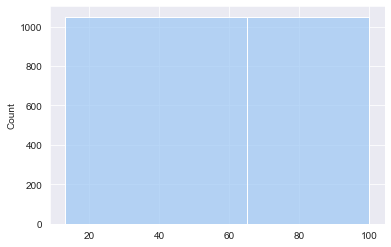

In [22]:
X_train = []
y_train = []

PARTICPANTS = 2100


for p in range(PARTICPANTS // 2):
    # Half were under 65 years old, 5% of them experienced have side effects
    random_young = randint(13, 64)
    
    X_train.append(random_young)
    y_train.append(1 if p / PARTICPANTS <= 0.05 else 0)

    # Half were over 65 years old, 95% of them experienced side effects
    random_old = randint(65, 100)
    
    X_train.append(random_old)
    y_train.append(0 if p / PARTICPANTS <= 0.05 else 1)

ax = sns.histplot(X_train, bins = [13, 65, 100])

In [23]:
X_train = np.array(X_train)
y_train = np.array(y_train)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform((X_train).reshape(-1,1))

In [30]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(16, input_shape = (1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

model.summary()

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_51 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
189/189 - 0s - loss: 0.4487 - accuracy: 0.8312 - val_loss: 0.2029 - val_accuracy: 0.9429
Epoch 2/20
189/189 - 0s - loss: 0.4072 - accuracy: 0.8608 - val_loss: 0.1919 - val_accuracy: 0.9810
Epoch 3/20
189/189 - 0s - loss: 0.4113 - accuracy: 0.8582 - val_loss: 0.2409 - val_accuracy: 1.0000
Epoch 4/20
189/189 - 0s - loss: 0.4062 - accuracy: 0.8540 - val_loss: 0.1738 - val_ac